In [1]:
import pandas as pd
df_corpus = pd.read_csv("selectedDataset.csv")
df_corpus.head(5)

,ID,Movie_Name_EN,Movie_Name_CN,Crawl_Date,Number,Username,Date,Star,Comment,Like
0,0,Avengers Age of Ultron,复仇者联盟2,2017/1/22,1,然潘,2015/5/13,3,连奥创都知道整容要去韩国。,2404
1,1,Avengers Age of Ultron,复仇者联盟2,2017/1/22,2,更深的白色,2015/4/24,2,非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、...,1231
2,2,Avengers Age of Ultron,复仇者联盟2,2017/1/22,3,有意识的贱民,2015/4/26,2,2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出...,1052
3,3,Avengers Age of Ultron,复仇者联盟2,2017/1/22,4,不老的李大爷耶,2015/4/23,4,《铁人2》中勾引钢铁侠，《妇联1》中勾引鹰眼，《美队2》中勾引美国队长，在《妇联2》中终于...,1045
4,4,Avengers Age of Ultron,复仇者联盟2,2017/1/22,5,ZephyrO,2015/4/22,2,虽然从头打到尾，但是真的很无聊啊。,723


In [2]:
comment = df_corpus['Comment']
comment_text = ''
for i in comment:
    #print(i)
    comment_text += i
    comment_text += '\n'

In [3]:
f = open("comment.txt",'w') 
f.write(comment_text)  #将字符串写入文件中
f.close()

In [1]:
import pandas as pd
import numpy as np
from translate import Translator

df_comment = pd.read_csv("res_dep8.csv",encoding="utf8")
# translator = Translator(to_lang="chinese")
# for i in df_comment['Comment']:
#     translator.translate(i)
df_comment.head(5)

,Comment,Star
0,奥创 知道 整容 韩国,3.0
1,失望 剧本 完全 敷衍了事 主线 剧情 没 突破 理解 人物 缺乏 动机 正邪 之间 妇...,2.0
2,年度 失望 作品 面面俱到 实则 画蛇添足 主题深刻 实则 老调重弹 推陈出新 实则 俗...,2.0
3,铁人 中 勾引 钢铁 侠 妇联 中 勾引 鹰眼 美队 中 勾引 美国 队长 妇联 中 终...,4.0
4,打到 尾 真的 无聊,2.0


In [2]:
df_comment['sentiment']=np.where(df_comment['Star']>2 ,1,0)
df_comment

,Comment,Star,sentiment
0,奥创 知道 整容 韩国,3.0,1
1,失望 剧本 完全 敷衍了事 主线 剧情 没 突破 理解 人物 缺乏 动机 正邪 之间 妇...,2.0,0
2,年度 失望 作品 面面俱到 实则 画蛇添足 主题深刻 实则 老调重弹 推陈出新 实则 俗...,2.0,0
3,铁人 中 勾引 钢铁 侠 妇联 中 勾引 鹰眼 美队 中 勾引 美国 队长 妇联 中 终...,4.0,1
4,打到 尾 真的 无聊,2.0,0
...,...,...,...
76431,全员 演技 在线 百合 味 很浓 深得 朕 心 233,4.0,1
76432,不想 消失 背负 世界 所有人 谎言 中,4.0,1
76433,周 冬雨 演 非主流 挺 专业 真 高圆圆,4.0,1
76434,口碑 不错 真的 不错 尴尬 配乐 演技 100 分 剧情 流畅 故事 讲清楚 觉得,4.0,1


In [33]:
df_positive = df_comment.loc[df_comment['sentiment'] == 1]
df_negative = df_comment.loc[df_comment['sentiment'] == 0]

In [5]:
#Transform terms into text file
positive_comment = df_positive['Comment']
positive_text = ''
for i in positive_comment:
    positive_text += i
    positive_text += '\n'

f = open("positive_comment.txt",'w') 
f.write(positive_text)  
f.close()

In [11]:
#Create word cloud
import stylecloud
from palettable.cartocolors.sequential import BluGrn_7 #import color sequence

stopwords = open('stop_words.txt', encoding='utf-8').read().split('\n')

stylecloud.gen_stylecloud(file_path = "positive_comment.txt",
                          font_path = 'SourceHanSansCN-Regular-2.otf',
                          output_name = 'positive1.png',
                          size = 500,
                          custom_stopwords = stopwords,
                          icon_name = "fas fa-grin-squint",
                          palette = 'cartocolors.sequential.BluGrn_7',
                          background_color='white',
                          gradient='horizontal')

In [12]:
negative_comment = df_negative['Comment']
negative_text = ''
for i in negative_comment:
    negative_text += i
    negative_text += '\n'

f = open("negative_comment.txt",'w') 
f.write(negative_text)  #将字符串写入文件中
f.close()

In [14]:
import stylecloud
from palettable.cartocolors.sequential import RedOr_7

stopwords = open('stop_words.txt', encoding='utf-8').read().split('\n')

stylecloud.gen_stylecloud(file_path = "negative_comment.txt",
                          font_path = 'SourceHanSansCN-Regular-2.otf',
                          output_name = 'negative1.png',
                          size = 500,
                          custom_stopwords = stopwords,
                          icon_name = "fas fa-angry",
                          palette = 'cartocolors.sequential.RedOr_7',
                          background_color='white',
                          gradient='horizontal')

In [30]:
#from googletrans import Translator
#import pandas as pd
translator = Translator()
negative_comment = df_negative['Comment']
negative_text = ''
for i in negative_comment:
    #print(i)
    negative_text += i
    #negative_text += '\n'
    
from translate import Translator

 
# 在任何两种语言之间，中文翻译成英文
translator= Translator(from_lang="chinese",to_lang="english")
translation = translator.translate(negative_text)

#df_negative['English'] = df_negative['Comment'].apply(translator.translate, src='zh-cn', dest='en').apply(getattr, args=('text',))

In [86]:
import jieba 
file1 = open('negative_comment.txt', encoding="utf8")  
negative_words = file1.read()
neg_words = jieba.lcut(negative_words)
neg_counts = dict()
for word in neg_words:
    neg_counts[word] = neg_counts.get(word,0) + 1
neg_counts

{' ': 377626,
 '失望': 656,
 '剧本': 370,
 '完全': 842,
 '敷衍了事': 5,
 '主线': 57,
 '剧情': 3763,
 '没': 2342,
 '突破': 22,
 '理解': 166,
 '人物': 490,
 '缺乏': 56,
 '动机': 29,
 '正邪': 3,
 '之间': 67,
 '妇联': 30,
 '内部': 3,
 '没什么': 177,
 '火花': 7,
 '团结': 4,
 '分裂': 9,
 '三段式': 1,
 '老套': 129,
 '利用': 12,
 '积攒': 6,
 '下来': 91,
 '形象': 69,
 '魅力': 13,
 '搞': 205,
 '出': 434,
 '意思': 104,
 '写得': 6,
 '肤浅': 49,
 '平面': 8,
 '场面': 115,
 '调度': 12,
 '混乱': 193,
 '呆板': 3,
 '满屏': 30,
 '铁甲': 1,
 '审美疲劳': 21,
 '笑': 853,
 '点算': 2,
 '差强人意': 6,
 '\n': 21453,
 '年度': 72,
 '作品': 273,
 '面面俱到': 1,
 '实则': 18,
 '画蛇添足': 5,
 '主题深刻': 2,
 '老调重弹': 2,
 '推陈出新': 1,
 '俗不可耐': 9,
 'high': 19,
 '劲': 9,
 '不足': 31,
 '气': 49,
 '一集': 9,
 '趣味': 10,
 '全无': 14,
 '这集': 4,
 '点': 667,
 '明显': 127,
 '刻意': 83,
 '心虚': 2,
 '全片': 184,
 '片段': 64,
 '紧张': 8,
 '激动': 27,
 '太弱': 55,
 '奥创': 34,
 '打': 39,
 '到': 74,
 '尾': 75,
 '真的': 1917,
 '无聊': 392,
 '一颗': 513,
 '彩蛋': 101,
 '降一星': 3,
 '外加': 15,
 '漫威': 65,
 '编剧': 507,
 '有心无力': 1,
 '复仇者': 26,
 '联盟': 27,
 '只能': 440,
 '永远': 100,
 '着手': 2

In [47]:
import jieba 
file2 = open('positive_comment.txt', encoding="utf8")  
positive_words = file2.read()
pos_words = jieba.lcut(positive_words)
pos_counts = dict()
for word in pos_words:
    pos_counts[word] = pos_counts.get(word,0) + 1
pos_counts

{' ': 1157161,
 '奥创': 170,
 '知道': 2262,
 '整容': 17,
 '韩国': 85,
 '\n': 54983,
 '铁人': 122,
 '中': 2610,
 '勾引': 9,
 '钢铁': 533,
 '侠': 590,
 '妇联': 222,
 '鹰眼': 140,
 '美队': 956,
 '美国': 502,
 '队长': 470,
 '终于': 744,
 '绿巨人': 126,
 '表白': 76,
 '黑寡妇': 125,
 '实际行动': 2,
 '告诉': 266,
 '忠贞不二': 1,
 '治疗': 6,
 '不孕': 3,
 '不育': 3,
 '作战': 22,
 '武器': 30,
 '变成': 489,
 '两支': 2,
 '验孕': 1,
 '棒': 739,
 '坚决': 15,
 '相信': 450,
 '快银': 100,
 '死': 1187,
 '后面': 750,
 '回来': 323,
 '剧情': 7833,
 '第一集': 13,
 '好玩': 100,
 '全靠': 46,
 '密集': 198,
 '笑点': 1293,
 '提神': 7,
 '僧多粥少': 3,
 '直接': 330,
 '后果': 32,
 '每部': 44,
 '寡姐': 91,
 '换': 169,
 '队友': 39,
 '谈恋爱': 64,
 '这特': 11,
 '打斗': 632,
 '辛苦': 176,
 '真心': 734,
 '求': 94,
 '放过': 26,
 '结尾': 1495,
 '彩蛋': 696,
 '洛基': 35,
 '漫威粉': 18,
 '勿': 14,
 '喷': 402,
 '真': 1412,
 '感觉': 3841,
 '第一部': 600,
 '差': 993,
 '火候': 51,
 '没想到': 384,
 '弱': 469,
 '失望': 884,
 '之极': 2,
 '属于': 202,
 '超级': 850,
 '英雄': 960,
 '春晚': 64,
 '角色': 1027,
 '走马灯': 5,
 '出场': 205,
 '眼花缭乱': 29,
 '没': 5045,
 '办法': 106,
 '留下': 147,
 '太深': 

In [72]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


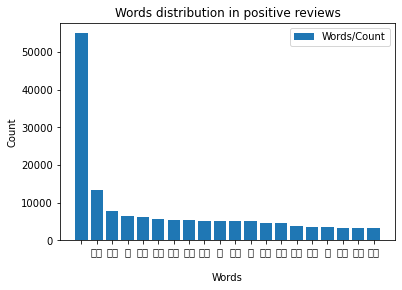

In [73]:
import matplotlib.pyplot as plt
import nltk

pos_by_value = sorted(pos_counts.items(),key = lambda item:item[1],reverse=True)
pos_list = pos_by_value[1:51]
pos20 = {}
for i in pos_list:
    pos20[i[0]] = i[1]  

plt.bar(pos20.keys() , pos20.values(), label="Words/Count")
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Words distribution in positive reviews')
plt.legend()
plt.show()

In [81]:
with open('pos_counts.csv', 'w',encoding = 'utf-8') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in pos_counts.items()]
with open('neg_counts.csv', 'w', encoding = 'utf-8') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in neg_counts.items()]